### make_classification
* sklearn.datasets.make_classification
* (n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
* n_samples : 표본 데이터의 수 (default=100)
* n_features : 독립 변수의 수(전체 피처의 수) (default=20)
* n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수 (default=2)
* n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수 (default=2)
* n_classes : 종속 변수의 클래스 수 default=2)
* n_clusters_per_class : 클래스 당 클러스터의 수 (default=2)

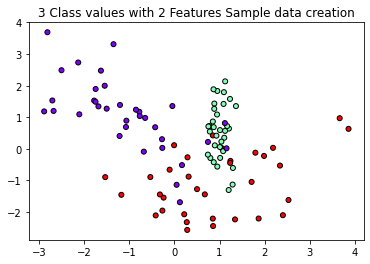

In [7]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
# s : size
# edgecolors : 마커 테두리선 색
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolors='k')

In [12]:
import numpy as np

# Classifier의 Decision Boundary를 시각화하는 함수
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    # The Zorder attribute of the Matplotlib Module helps us to improve the overall 
    # representation of our plot. This property determines how close the points or plot is to the observer. 
    # The higher the value of Zorder closer the plot or points to the viewer.
    # clim : color limit
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)
    
    # meshgrid 형태의 모든 좌표값으로 예측 수행
    # linspace : 구간 시작점, 구간 끝점, 구간 내 숫자 개수
    # ravel : 다차원 배열을 1차원으로 변환
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), 
                         np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf()를 이용하여 class boundary를 visualization 수행
    n_classes = len(np.unique(y))
    
    # contourf : 등고선 색상 표시
    # levels : 등고선의 개수
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\user\AppData\Local\Temp\ipykernel_5092\4240878813.py:25: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


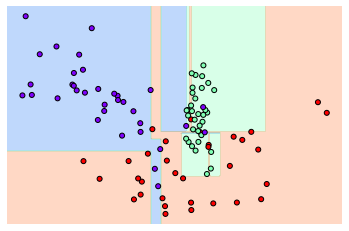

In [13]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화
# X_features, y_labels 학습
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)

# visualize_boundary 함수의 model=dt_clt, x=X_features, y=y_labels
visualize_boundary(dt_clf, X_features, y_labels)

C:\Users\user\AppData\Local\Temp\ipykernel_5092\4240878813.py:25: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


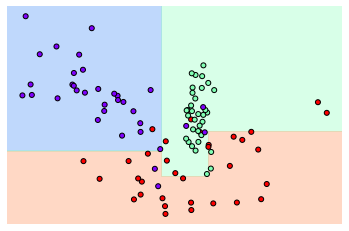

In [14]:
# min_sample_leaf=6으로 트리 생성 조건을 제약한 Decision Boundary 시각화
# min_sample_leaf=6으로 X_features, y_labels 학습
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)

# visualize_boundary 함수의 model=dt_clt, x=X_features, y=y_labels
visualize_boundary(dt_clf, X_features, y_labels)